In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [4]:
df = pd.read_csv("data/octane.csv", sep=',', index_col='Sample')
df

,Material1,Material2,Material3,Condition,Octane
Sample,,,,,
1,55.33,1.72,54,1.66219,92.19
2,59.13,1.20,53,1.58399,92.74
3,57.39,1.42,55,1.61731,91.88
4,56.43,1.78,55,1.66228,92.80
5,55.98,1.58,54,1.63195,92.56
...,...,...,...,...,...
78,67.60,1.84,55,1.64758,91.86
79,64.81,2.24,54,1.69592,91.61
80,63.13,1.60,52,1.66118,92.17


In [6]:
XY = df.values


In [8]:
# qf = af.averaging_function("WM", rhofunc=func.Power(1.1, 0.01), alpha=0.86)
qf = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.91)
amf = af.averaging_function("AM")

In [9]:
K, c = pca.find_rob_center(XY, qf)
print(K, c)

1 [61.93426829  1.26695122 56.80487805  1.5860578  91.65219512]


In [10]:
Z = XY - c
U = (Z * Z).sum(axis=1)
U.sort()

In [12]:
N = len(XY)
(N - 7) / N

0.9146341463414634

In [13]:
XY2 = XY - c
S = XY2.T @ XY2
X2 = XY2[:,0]
Y2 = XY2[:,1]
print(S)

[[ 1.27848626e+04 -1.18680889e+03  2.62502927e+03 -8.04398372e+01
  -1.25684800e+03]
 [-1.18680889e+03  3.05915991e+02 -2.90846829e+02  6.77456204e+00
   9.11231622e+01]
 [ 2.62502927e+03 -2.90846829e+02  2.48995122e+03 -7.35356200e+01
  -4.11420488e+02]
 [-8.04398372e+01  6.77456204e+00 -7.35356200e+01  4.04536722e+00
   1.63355904e+01]
 [-1.25684800e+03  9.11231622e+01 -4.11420488e+02  1.63355904e+01
   1.62219539e+02]]


In [14]:
a0, L0, Z0 = pca.find_pc(XY2)
plt.plot(sorted(Z0), marker='o')
plt.show()
print(a0)

[ 3.48694247 -0.33067368  0.84133472 -0.02565891 -0.35263478]


(82,)


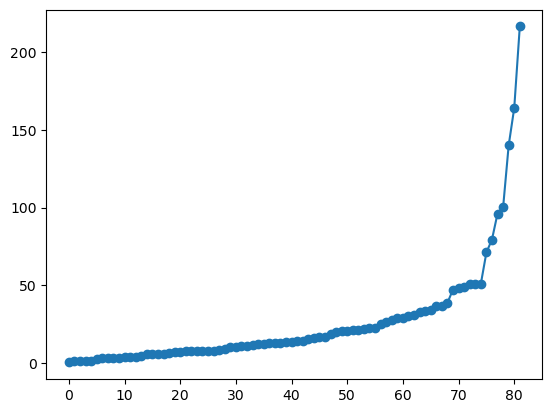

[ 0.976869   -0.09579603  0.16715557 -0.00407742 -0.09269558]


In [15]:
a1, L1, Z1 = pca.find_rob_pc(XY2, qf)
plt.plot(sorted(Z1), marker='o')
plt.show()
print(a1)